# Финальный проект: Банки — Анализ оттока клиентов.

**Описание проекта:**

Нашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка.
«Метанпромбанк» — деньги не пахнут!

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

- USERID - идентификатор пользователя
- score - баллы кредитного скоринга
- city - город
- gender - пол
- age - возраст
- equity - количество баллов собственности	
- balance - баланс на счете	
- products - количество продуктов, которыми пользуется клиент
- credit_card - есть ли кредитная карта
- last_activity - активный клиент
- EST_SALARY - заработная плата клиента
- churn - ушёл или нет

**Декомпозиция:**

- Шаг 1. Откройте файл с данными и изучите общую информацию; 
    Заменить названия столбцов;
    Проверить и проанализировать пропуски и возможные причины их появления;  
    Проверить на наличие дубликатов;
    Кодирование данных для возможности определения средних и медианных значений.
- Шаг 2. Исследовательский анализ данных:
    сравнить портреты типичных клиентов;
    корреляционный анализ.
    определить все значимые признаки отточности;
- Шаг 3. Проверка статистических гипотез:
    Проверить гипотезу различия дохода между теми клиентами, которые
    ушли и теми, которые остались;
    Сформулировать и проверить статистическую гипотезу относительно
    представленных данных, которая поможет внести ясность в исследование.
- Шаг 4. Промежуточные выводы, с показателями влияющими на отток клиентов.
- Шаг 5. Сформировать сегменты с высокой отточностью (более 30% и выше) в небольших группах (500-600 клиенторв) и приотизировать их.
- Шаг 6. По приеоритетным сегментам составить рекомендации для отдела маркетинга.

## 1 Шаг. Откройте файл с данными и изучите общую информацию

In [1]:
# импортируем библиотеки 
import pandas as pd
!pip install phik  --quiet 
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Сохранем данные в переменную data_1 и посмотрим информацию о датасете и сам датасет:

In [2]:
data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data_1.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Приведем названия столбцов к нижнему регистру: 

In [4]:
data_1.columns = data_1.columns.str.lower()

Изменим столбец с гендерным признаком на бинарный тип: М - 1, Ж - 0:

In [5]:
data = pd.get_dummies (data_1, columns=['gender'], drop_first= True )   

Создадим столбцы с городами приведенные к бинарному типу:

In [6]:
data = pd.get_dummies(data, columns=['city'])
data = data.rename(columns={'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск', 'city_Ярославль':'Ярославль'})
data.head(10)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,1,0,0,1
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,1,0,1,0
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,0,0,0,1
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,0,0,0,1
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,1,0,0,1
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,0,0,0,1


Посмотрим количество пропусков:

In [7]:
data.isna().sum()

userid              0
score               0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
gender_М            0
Ростов              0
Рыбинск             0
Ярославль           0
dtype: int64

Ввиду небольшого количества пропусков в столбце с возрастом, посмотрим их все:

In [8]:
age_nan = pd.isnull(data["age"]) 
    
data[age_nan] 

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
1247,228075,932.0,NaN,5,7601719.20,2,1,1,408121.16,0,1,0,0,1
2165,187635,692.0,NaN,0,NaN,1,1,1,160368.82,0,0,0,1,0
2444,221156,913.0,NaN,0,NaN,1,1,1,135693.24,0,1,0,0,1
3091,138660,836.0,NaN,5,294315.53,2,0,1,63310.22,1,0,1,0,0
4912,210674,834.0,NaN,1,238330.52,2,0,1,93775.06,0,1,0,1,0
5470,218868,827.0,NaN,4,448959.07,2,1,1,67835.95,0,0,0,1,0
5495,151662,884.0,NaN,0,NaN,1,1,1,137500.77,0,0,0,1,0
7236,210135,908.0,NaN,4,1120340.31,3,1,1,85002.15,0,0,0,1,0
7248,219343,920.0,NaN,0,NaN,1,1,0,159248.67,0,0,0,1,0
7345,184913,829.0,NaN,3,188648.77,2,0,1,75206.90,0,0,0,0,1


Сравним статистические значения с пропусками в возрасте со значениями без пропусков:

In [9]:
display(data[data['age'].isna()].describe())

display(data[~data['age'].isna()].describe())

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,26.00000,26.000000,0.0,26.000000,1.000000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,194637.50000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462,0.538462,0.038462,0.461538,0.500000
std,31310.54801,83.418316,NaN,1.961161,2.265235e+06,0.561591,0.429669,0.429669,175135.552768,0.196116,0.508391,0.196116,0.508391,0.509902
min,127440.00000,663.000000,NaN,0.000000,1.715102e+05,1.000000,0.000000,0.000000,55073.630000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185142.00000,827.500000,NaN,0.000000,2.523268e+05,1.000000,1.000000,1.000000,77807.760000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,208447.00000,888.500000,NaN,0.000000,4.173611e+05,1.000000,1.000000,1.000000,142598.860000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,219224.25000,919.250000,NaN,3.000000,1.039439e+06,2.000000,1.000000,1.000000,176991.690000,0.000000,1.000000,0.000000,1.000000,1.000000
max,228075.00000,942.000000,NaN,5.000000,7.601719e+06,3.000000,1.000000,1.000000,922080.250000,1.000000,1.000000,1.000000,1.000000,1.000000


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374,0.500401,0.141969,0.268999,0.589031
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172,0.500025,0.349036,0.443462,0.492034
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Из того, что бросается в глаза - пропуски в возрасте за исключением 1 случая у неотточных клиентов, и этот же 1 клиент - единственный из г. Ростов. Так же у клиентов с пропусками в возрасте, много пропусков в столбце с балансом. С учетом количества таких клиентов относительно всего дф, считаю целеесообразным удалить эти строки.

In [10]:
data =  data.dropna(subset=['age']).reset_index(drop=True)
data['age'] = data['age'].astype(int) # И приведем значения возраста к целочисленному типу
data.isna().sum()

userid              0
score               0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
gender_М            0
Ростов              0
Рыбинск             0
Ярославль           0
dtype: int64

Сравним статистические значения с пропусками в столбце баланса со значениями без пропусков:

In [11]:
balance_na = data[data['balance'].isna()]
display(balance_na.describe())

balance_not_na = data[~data['balance'].isna()]
display(balance_not_na.describe())


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704,0.558140,0.103115,0.257130,0.639754
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327,0.496717,0.304176,0.437148,0.480177
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7695.000000,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698,0.483301,0.153476,0.272515,0.574009
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837,0.499754,0.360469,0.445282,0.494524
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000,0.000000,0.000000,0.000000,1.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
mean_na = balance_na.mean().round(2)
mean_not_na = balance_not_na.mean().round(2)

mean_na_table = pd.concat([mean_na, mean_not_na], axis=1, join='inner')
mean_na_table.columns = ['с пропусками', 'без пропусков']
mean_na_table['% изменения'] = ((mean_na_table['с пропусками']/mean_na_table['без пропусков']-1)*100).round(2)
mean_na_table

,с пропусками,без пропусков,% изменения
userid,171904.89,171710.89,0.11
score,865.36,843.74,2.56
age,42.09,42.92,-1.93
equity,0.05,3.39,-98.53
balance,NaN,827245.59,NaN
products,1.16,2.08,-44.23
credit_card,0.82,0.64,28.12
last_activity,0.55,0.52,5.77
est_salary,226345.42,124520.39,81.77
churn,0.01,0.23,-95.65


Клиенты с пропусками в столбце с балансом выделяются очень низкими баллами собственности, у них существенно ниже среднее количество продуктов, выше зарплата и они практически все неотточные. Возможно это клиенты имеющие кредит в этом банке, и для такого типа счета не ведется статистика баланса, т.к. по сути это деньги банка, в пользу этой версии говорит низкий уровень баллов собственности (кредит как раз на преобритение этой собственности), количество продуктов банка как раз чуть выше 1, и более высокий уровень клиентов с кридитной картой 🤔. Думаю эти пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно), без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.Предлагаю оставить эти данные без заполнения.

Проверим датасет на дубликаты:

In [13]:
data.duplicated().sum() 

0

Явных дубликатов не найдено, посмотрим есть ли повторяющиеся идентификаторы пользователей:

In [14]:
data['userid'].duplicated().sum()

50

In [15]:
data[data['userid'].duplicated(keep=False)].sort_values(by='userid').head(10)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
1892,116540,883.0,55,1,362756.49,3,0,1,175920.48,1,0,0,1,0
7683,116540,887.0,38,0,NaN,1,0,1,119247.61,0,0,0,0,1
4862,117943,855.0,32,6,1036832.93,4,1,1,107792.71,1,0,0,1,0
7531,117943,880.0,40,0,NaN,1,1,0,137718.93,0,0,0,0,1
5856,120258,908.0,38,4,2213581.63,2,0,1,160327.77,1,0,0,1,0
5889,120258,905.0,30,0,NaN,1,1,1,146427.96,0,1,0,0,1
1410,123461,829.0,59,0,96222.44,2,0,1,102771.55,1,0,0,0,1
8621,123461,934.0,34,0,NaN,2,1,0,291619.27,0,1,0,1,0
9750,124450,758.0,36,0,73574.07,2,0,1,79963.59,0,0,0,1,0
8151,124450,859.0,38,6,516811.20,1,1,1,95144.63,1,0,0,0,1


Как видно из таблицы с дубликатами по индитификатору пользователей, одинаковые id имеют пользователи из разных городов - из Рыбинска и Ярославля, возможно раньше была база не связанная между собой и повтор id в разных городах был возможен. Удалять дубликаты мы не будем.

При применении метода describe() найдено аномальное значение с количеством продуктов = 0:

In [16]:
data[data['products']==0]

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
8939,147837,962.0,79,3,NaN,0,0,0,25063.96,1,0,0,1,0


Удалим эту строку:

In [17]:
data = data[data['products']!=0]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9973
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9973 non-null   int64  
 1   score          9973 non-null   float64
 2   age            9973 non-null   int64  
 3   equity         9973 non-null   int64  
 4   balance        7695 non-null   float64
 5   products       9973 non-null   int64  
 6   credit_card    9973 non-null   int64  
 7   last_activity  9973 non-null   int64  
 8   est_salary     9973 non-null   float64
 9   churn          9973 non-null   int64  
 10  gender_М       9973 non-null   uint8  
 11  Ростов         9973 non-null   uint8  
 12  Рыбинск        9973 non-null   uint8  
 13  Ярославль      9973 non-null   uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 896.0 KB


In [19]:
round(data.isna().sum()/len(data)*100,2)

userid            0.00
score             0.00
age               0.00
equity            0.00
balance          22.84
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
gender_М          0.00
Ростов            0.00
Рыбинск           0.00
Ярославль         0.00
dtype: float64

**Вывод:**

Мы провели предобработку данных.
Столбцы с городом и полом перекодированы в бинарный вид.
В столбце с возрастом было 26 пропусков, которые мы удалили ввиду маленького количества относительно всего датасета.
В столбце с балансом пропусков 22.85%, удалять такое количество или заменять без подтвержденной информации причины появления этих пропусков мы не можем, оставляем как есть.
Полные дубликаты не найдены. Присутствуют дубликаты с id номером, их тоже оставляем.
Так же найлено одна строка с аномальным значением в столбце с количеством продуктов = 0 - строка удалена.

## 2 Шаг. Исследовательский анализ данных.

**Посмотрим портрет клиента банка:**

In [21]:
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,9973.000000,9973.000000,9973.000000,9973.000000,7.695000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,171757.616966,848.671212,42.730773,2.630803,8.272456e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292,0.500451,0.141983,0.268926,0.589091
std,33696.365256,65.393153,12.175166,1.980060,1.980327e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105,0.500025,0.349051,0.443424,0.492024
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142757.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201164.000000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Портрет клиента банка:
- средний балл кредитного скоринга 848
- средний возраст 42.7, медианный чуть меньше - 40
- количество баллов собственности в среднем 2.6
- баланс на счете в среднем 827245, медиана значительно меньше 524295, что говорит о выбросах
- количество продуктов, которыми пользуется клиент в среднем 1.8
- кредитная карта есть у 68%
- активных клиентов 52%
- средняя заработная плата клиента 147786, медианная 119628
- процент оттока 18%
- женщин и мужчин поровну

Так же составим портреты отточных клиентов:

In [22]:
data_churn1 = data[data['churn']==1]
data_churn1.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,1818.000000,1818.000000,1818.000000,1818.000000,1.806000e+03,1818.000000,1818.000000,1818.000000,1.818000e+03,1818.0,1818.000000,1818.000000,1818.000000,1818.000000
mean,170992.833883,863.361936,41.429593,3.763476,1.134458e+06,2.377338,0.551705,0.702420,1.483575e+05,1.0,0.650715,0.145765,0.239824,0.614411
std,35296.715110,49.580696,11.144754,1.586316,2.034446e+06,0.922162,0.497456,0.457319,1.229320e+05,0.0,0.476875,0.352967,0.427093,0.486868
min,94561.000000,706.000000,18.000000,0.000000,6.000000e+00,1.000000,0.000000,0.000000,1.088027e+04,1.0,0.000000,0.000000,0.000000,0.000000
25%,141302.500000,828.000000,32.000000,3.000000,3.874822e+05,2.000000,0.000000,0.000000,8.328566e+04,1.0,0.000000,0.000000,0.000000,0.000000
50%,170638.500000,866.000000,39.000000,4.000000,7.839089e+05,2.000000,1.000000,1.000000,1.254089e+05,1.0,1.000000,0.000000,0.000000,1.000000
75%,201412.750000,898.000000,52.000000,5.000000,1.348128e+06,3.000000,1.000000,1.000000,1.760178e+05,1.0,1.000000,0.000000,0.000000,1.000000
max,229058.000000,1000.000000,75.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.263028e+06,1.0,1.000000,1.000000,1.000000,1.000000


И тоже самое для неотточных клиентов:

In [23]:
data_churn0 = data[data['churn']==0]
data_churn0.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,Ростов,Рыбинск,Ярославль
count,8155.000000,8155.000000,8155.000000,8155.000000,5.889000e+03,8155.000000,8155.000000,8155.000000,8.155000e+03,8155.0,8155.000000,8155.000000,8155.000000,8155.000000
mean,171928.110607,845.396199,43.020846,2.378296,7.330316e+05,1.758921,0.708890,0.482894,1.476746e+05,0.0,0.466953,0.141140,0.275414,0.583446
std,33328.979304,67.993107,12.375207,1.970843,1.953952e+06,0.713412,0.454302,0.499738,1.426844e+05,0.0,0.498937,0.348188,0.446750,0.493018
min,95384.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.0,0.000000,0.000000,0.000000,0.000000
25%,143046.000000,796.000000,34.000000,0.000000,2.796547e+05,1.000000,0.000000,0.000000,7.344555e+04,0.0,0.000000,0.000000,0.000000,0.000000
50%,173142.000000,848.000000,40.000000,3.000000,4.754101e+05,2.000000,1.000000,0.000000,1.182276e+05,0.0,0.000000,0.000000,0.000000,1.000000
75%,201160.500000,900.000000,51.000000,4.000000,8.538264e+05,2.000000,1.000000,1.000000,1.739609e+05,0.0,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,0.0,1.000000,1.000000,1.000000,1.000000


Сделаем таблицу со средними значениями характеристик для отточных и неотточных пользователей с процентом изменения этих характеристик у отточных, относительно неотточных:

In [24]:

mean_churn1 = data_churn1.mean().round(2)
mean_churn0 = data_churn0.mean().round(2)

mean_table = pd.concat([mean_churn1, mean_churn0], axis=1, join='inner')
mean_table.columns = ['отточные', 'неотточные']
mean_table['% изменения'] = ((mean_table['отточные']/mean_table['неотточные']-1)*100).round(2)
mean_table

,отточные,неотточные,% изменения
userid,170992.83,171928.11,-0.54
score,863.36,845.40,2.12
age,41.43,43.02,-3.70
equity,3.76,2.38,57.98
balance,1134458.21,733031.63,54.76
products,2.38,1.76,35.23
credit_card,0.55,0.71,-22.54
last_activity,0.70,0.48,45.83
est_salary,148357.48,147674.64,0.46
churn,1.00,0.00,inf


У отточных выше средний балл собственности на 58%, средний баланс на 55%, среднее количество продуктов на 35%, средняя активность на 45%, доля мужчин у отточных выше на 38%. Средний возраст отличается незначительно - на 3.6%, так же как и средний кредитный скорринг - 2%. 

Для баланса и зарплаты посчитаем медиану, т.к. на среднее влияют выбросы:

In [25]:
median_churn1 = data_churn1[['balance','est_salary']].median().round(2)
median_churn0 = data_churn0[['balance','est_salary']].median().round(2)

median_table = pd.concat([median_churn1, median_churn0], axis=1, join='inner')
median_table.columns = ['отточные', 'неотточные']
median_table['% изменения'] = ((median_table['отточные']/median_table['неотточные']-1)*100).round(2)
median_table

,отточные,неотточные,% изменения
balance,783908.90,475410.09,64.89
est_salary,125408.88,118227.60,6.07


Как видно из таблицы, медиана заметно ниже среднего, но картина такая же, у отточных медианный баланс на счете существенно выше - на 65%. 

**Распределения непрерывных:**

Визуализируем распределение баллов скоринга:

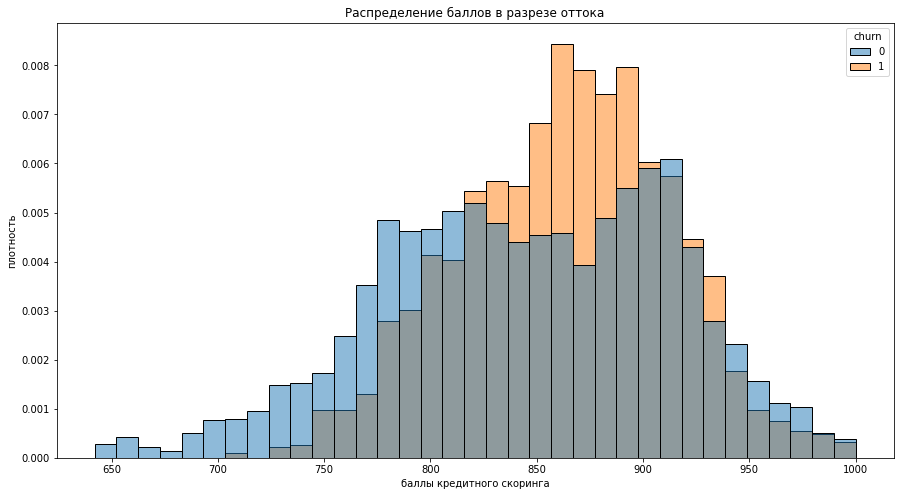

In [26]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, bins=35, x="score", stat="density", common_norm=False, hue="churn")

plt.title('Распределение баллов в разрезе оттока')
plt.xlabel('баллы кредитного скоринга')
plt.ylabel('плотность')
plt.show()

По распределению баллов виден повышенный отток в интервале 840 - 950.

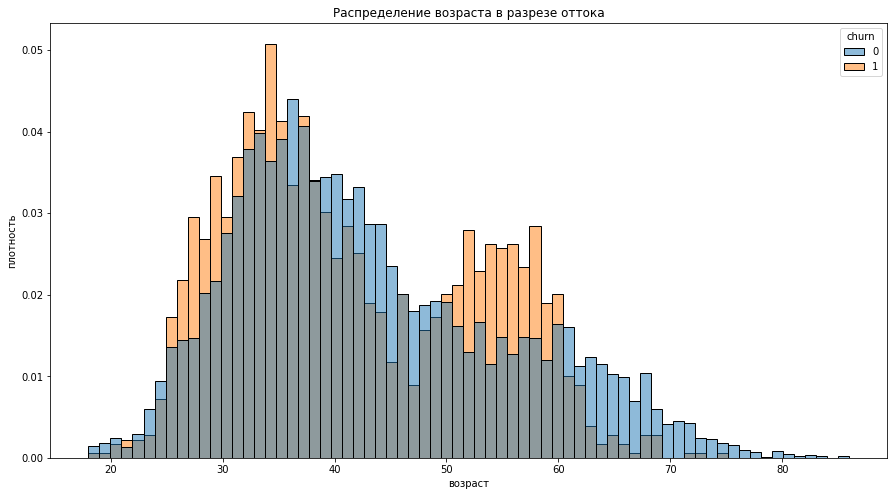

In [27]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, bins=69, x="age", stat="density", common_norm=False, hue="churn")

plt.title('Распределение возраста в разрезе оттока')
plt.xlabel('возраст')
plt.ylabel('плотность')
plt.show()

По распределению возраста виден повышенный отток в интервалах с 25 до 36, с 49 до 61.

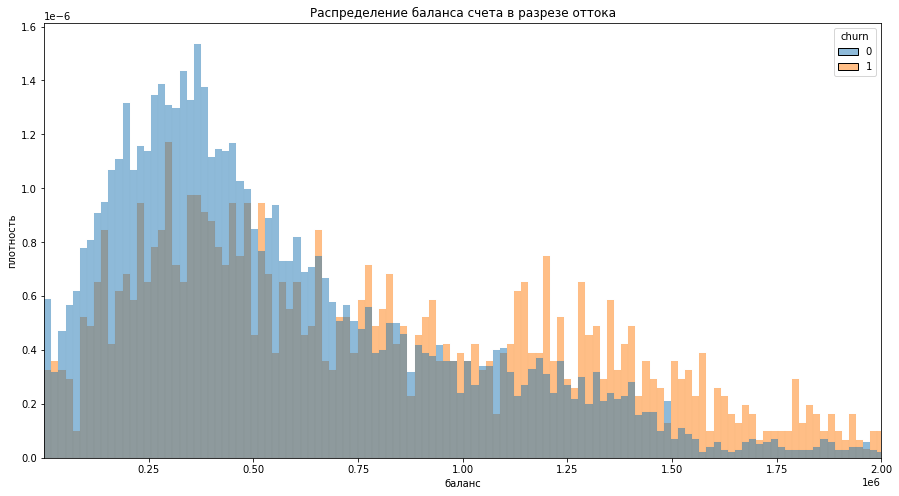

In [28]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, bins=7000, x="balance", stat="density", common_norm=False, hue="churn")
plt.xlim(1, 2000000)
plt.title('Распределение баланса счета в разрезе оттока')
plt.xlabel('баланс')
plt.ylabel('плотность')
plt.show()

По распределению баланса виден повышенный отток в интервалахс 1100000 и выше. 

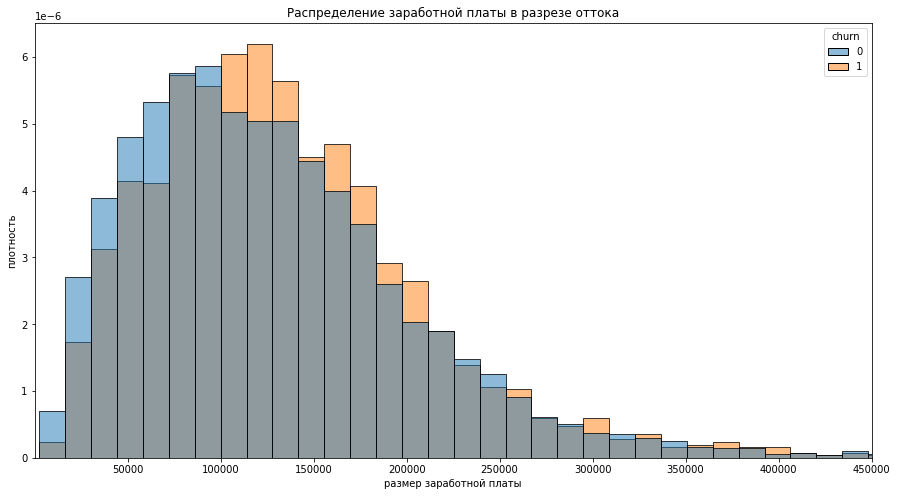

In [29]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, bins=100, x="est_salary", stat="density", common_norm=False, hue="churn")
plt.xlim(1,450000)
plt.title('Распределение заработной платы в разрезе оттока')
plt.xlabel('размер заработной платы')
plt.ylabel('плотность')
plt.show()

По распределению заработной платы виден повышенный отток в интервалах с 100000 до 150000, со 155000 до 210000.

**Построим диаграмы для категориальных переменных:**

In [31]:
city=data_1.groupby('city').agg({'churn':'mean'}).reset_index()
city['churn'] = (city['churn']*100).round(2)
city

,city,churn
0,Ростов,18.77
1,Рыбинск,16.22
2,Ярославль,18.97


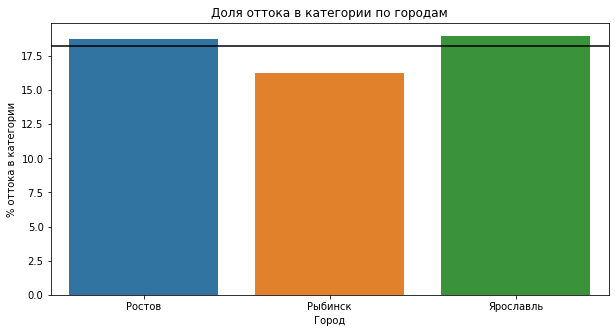

In [32]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = city, x = 'city', y = 'churn')
ax.set_xlabel('Город')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по городам')
plt.axhline(y = 18.2, color='black')
plt.show()

По городам видим у Ростова и Ярославля отток чуть выше среднего - меньше чем на 1%, у рыбинска на 2% ниже среднего

In [33]:
gender =data_1.groupby('gender').agg({'churn':'mean'}).reset_index()
gender['churn'] = (gender['churn']*100).round(2)
gender

,gender,churn
0,Ж,12.75
1,М,23.64


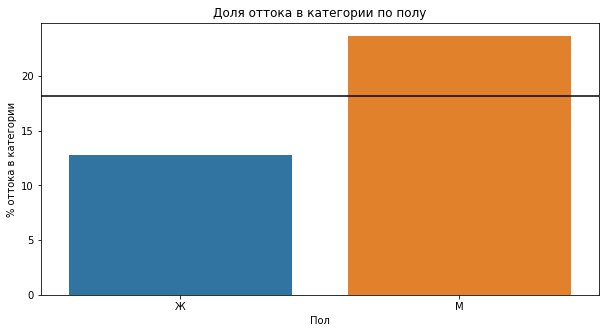

In [34]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = gender, x = 'gender', y = 'churn')
ax.set_xlabel('Пол')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по полу')
plt.axhline(y = 18.2, color='black')
plt.show()

У мужчин отток выше среднего на 5%, у женщин ниже на 5.5%.

In [35]:
credit_card = data_1.groupby('credit_card').agg({'churn':'mean'}).reset_index()
credit_card['churn'] = (credit_card['churn']*100).round(2)
credit_card

,credit_card,churn
0,0,25.56
1,1,14.74


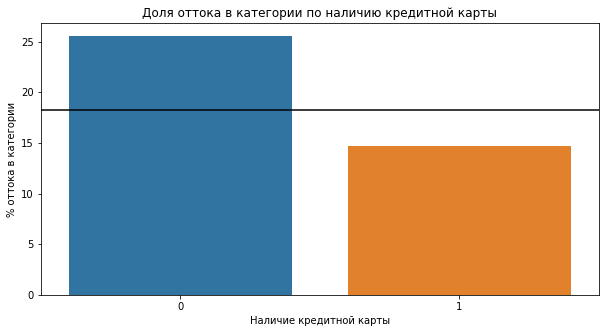

In [36]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = credit_card, x = 'credit_card', y = 'churn')
ax.set_xlabel('Наличие кредитной карты')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по наличию кредитной карты')
plt.axhline(y = 18.2, color='black')
plt.show()

Отток у клиентов с кредитной картой ниже среднего на 3.5%, без кредитной карты выше на 7%.

In [37]:
last_activity = data_1.groupby('last_activity').agg({'churn':'mean'}).reset_index()
last_activity['churn'] = (last_activity['churn']*100).round(2)
last_activity

,last_activity,churn
0,0,11.37
1,1,24.41


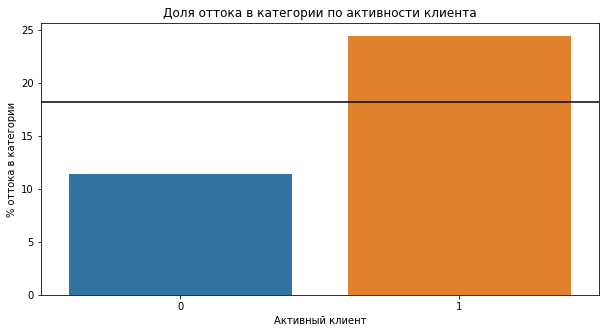

In [38]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = last_activity, x = 'last_activity', y = 'churn')
ax.set_xlabel('Активный клиент')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по активности клиента')
plt.axhline(y = 18.2, color='black')
plt.show()

Отток у активных клиентов выше среднего на 6%, у неактивных ниже на 7%.

In [39]:
equity = data_1.groupby('equity').agg({'churn':'mean'}).reset_index()
equity['churn'] = (equity['churn']*100).round(2)
equity

,equity,churn
0,0,3.47
1,1,12.02
2,2,15.78
3,3,20.87
4,4,25.08
5,5,30.08
6,6,36.02
7,7,46.25
8,8,35.29
9,9,53.85


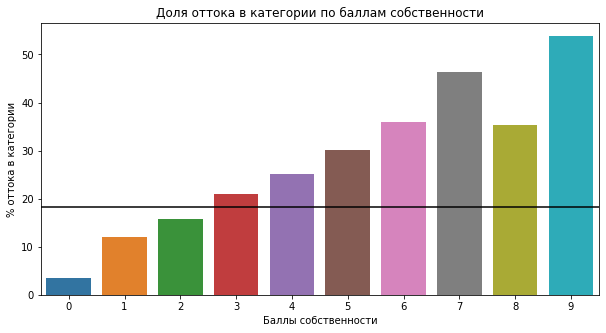

In [40]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = equity, x = 'equity', y = 'churn')
ax.set_xlabel('Баллы собственности')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по баллам собственности')
plt.axhline(y = 18.2, color='black')
plt.show()

У клиентов с баллами собственности от 0 до 2 отток ниже среднего, у клиентов с баллами от 3 и выше - выше среднего. Наблюдается тенденция линейного роста, за исключением категории с 8 баллами.

In [41]:
products = data_1.groupby('products').agg({'churn':'mean'}).reset_index()
products['churn'] = (products['churn']*100).round(2)
products = products[products['products']!=0]
products

,products,churn
1,1,7.03
2,2,19.10
3,3,28.59
4,4,63.29
5,5,42.11


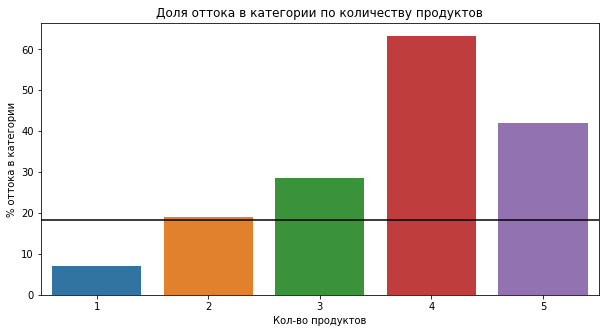

In [42]:
ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data = products, x = 'products', y = 'churn')
ax.set_xlabel('Кол-во продуктов')
ax.set_ylabel('% оттока в категории')
ax.set_title('Доля оттока в категории по количеству продуктов')
plt.axhline(y = 18.2, color='black')
plt.show()

У клиентов с 1 продуктом отток ниже среднего, с 2-мя на 1% выше среднего, с 3-5 значительно выше среднего. 

**корреляционный анализ:**

Построим матрицу корреляций phik:

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


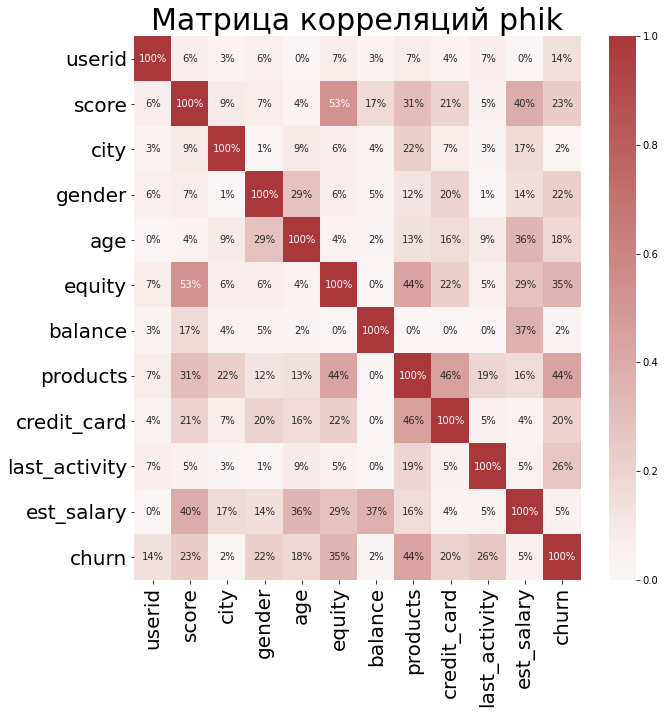

In [43]:
plt.figure(figsize = (10,10))

phik = data_1.phik_matrix()
sns.heatmap(phik, annot=True, fmt='.0%', cmap= 'vlag', center=0)
plt.title('Матрица корреляций phik', fontsize=30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

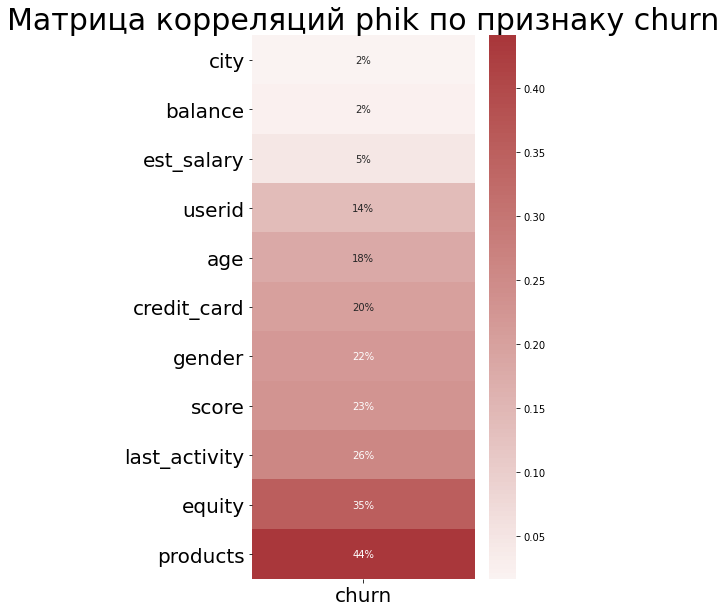

In [44]:
plt.figure(figsize = (5,10))

sns.heatmap(
    phik.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt='.0%', cmap= 'vlag', center=0)

plt.title('Матрица корреляций phik по признаку churn', fontsize=30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

По шкале Чеддока, для интересующей нас характеристки - оттоком, установленя связь:
- отсутствует для: города, баланса, заработной платы.
- слабая для: индетификатора пользователя, баллов кредитного скоринга, пола, возраста, наличия кредитной карты, активности пользователя.
- умеренная для: баллов собственности, количества используемых продуктов.

## 3 Шаг. Проверка статистических гипотез.

**Проверим гипотезу различия дохода между теми клиентами, которые
ушли и теми, которые остались.**

- Н0: различия в доходе между клиентами, которые ушли и которые остались - не значительны.
- Н1: существуют различия в доходе между клиентами, которые ушли и которые остались.

проверка c помощью t-test:

Критерии для возможности проведения t-test:

- Генеральные совокупности не должны зависеть друг от друга.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. (Но если мы не уверены в том, что они равны или как в нашем случае размер выборок разный - указываем equal_var= False)

In [45]:
results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


проверка c помощью u-test:

Критерии для возможности проведения u-test:

- Генеральные совокупности не должны зависеть друг от друга.
- Число значений в группах при использовании критерия Манна-Уитни не должно быть больше 30.
- Объем групп не должен быть строго одинаковым, но не должен сильно различаться.

При использовании библиотеки scipy стоит учитывать только первое требование.

In [46]:
results = st.mannwhitneyu (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'])

alpha = 0.05 

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.00016830729188229058
Отвергаем нулевую гипотезу


Посмотрим средние и медианы для столбца с доходами:

In [47]:
display(data[data['churn']==0]['est_salary'].mean())
display(data[data['churn']==0]['est_salary'].median())

147674.63788105457

118227.6

In [48]:
display(data[data['churn']==1]['est_salary'].mean())
display(data[data['churn']==1]['est_salary'].median())

148357.48315731573

125408.88

По разнице между средним и медианой видно, что в значениях есть выбросы.

Попробуем провести t-test со значениями без выбросов. Построим ящик с усами для столбца с доходом:

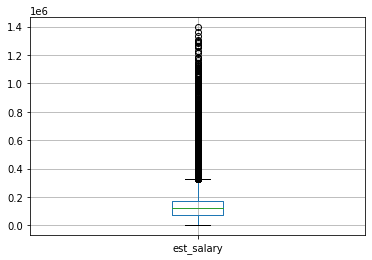

In [49]:
test_df = data
test_df.describe()
test_df.boxplot(column=['est_salary'])
plt.show()

Выбросы находятся примерно от 350000, отбросим все что выше:

In [50]:
test_df = test_df[test_df['est_salary']<350000]

Проведем еще раз t-test:

In [51]:
results = st.ttest_ind (
    test_df[test_df['churn']==0]['est_salary'],
    test_df[test_df['churn']==1]['est_salary'])

alpha = 0.05 

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.0002275155861273928
Отвергаем нулевую гипотезу


**Вывод:**

- При проведении теста 2-мя методами, мы получили разные результаты. Далее провели еще раз t-test, но с отброшеными выбросами и результаты между t-test и u-test стали аналогичными. Это говорит о том, что t-критерий чувствителен к выбросам. Доверять в таком случае стоит u-test, т.к. тест Манна-Уитни - ранговый метод и лучше подходит для проверки данных с выбросами.

- Итоги: существуют статистически значимые различия в доходе между клиентами, которые ушли и которые остались.


**Проверим гипотезу различия баллов кредитного скорринга между теми клиентами, которые
ушли и теми, которые остались.**

Выбор этой гипотезы заключается в низкой разнице между средними значениями в портретах - 2.13%

- Н0: различия в баллах между клиентами, которые ушли и которые остались - не значительны.
- Н1: существуют различия в баллах между клиентами, которые ушли и которые остались.

Также как и для баланса, выведем средние и медианы:

In [52]:
display(data[data['churn']==0]['score'].mean())
display(data[data['churn']==0]['score'].median())

845.3961986511342

848.0

In [53]:
display(data[data['churn']==1]['score'].mean())
display(data[data['churn']==1]['score'].median())

863.3619361936194

866.0

Разница между ними незначительная, что говорит об отсутствии аномальных значений, можем проверить t-критерием:

In [54]:
results = st.ttest_ind (
    data[data['churn']==0]['score'],
    data[data['churn']==1]['score'], equal_var = False)

alpha = 0.05 

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.3179430198200596e-37
Отвергаем нулевую гипотезу


Между баллами кредитного скорринга для отточных и неотточных есть статистически значимая разница.

## 4 Шаг. Промежуточные выводы, с показателями влияющими на отток клиентов.

**Вывод:**

в исследовательском анализе мы составили портреты отточных и неотточных клиентов и сравнили их: 
- У отточных выше средний балл собственности на 58%.
- Средний баланс на 55%.
- Среднее количество продуктов на 35%.
- Средняя активность на 45%.
- Доля мужчин у отточных выше на 38%. 
- Средний возраст отличается незначительно - на 3.6%.
- Средний кредитный скорринг - на 2%.

Построили гистограммы распределения непрерывных в разрезе оттока:
- для баллов кредитного скоринга можно выделить отточные интервалы с 840 до 950
- для возраста с 25 до 36, с 49 до 61.
- для баланса виден повышенный отток в интервалах с 1100000 и выше.  
- для заработной платы от 100000 до 140000, со 155000 до 210000.

Визуализировали для категориальных переменных доли оттока:
- у городов чуть выше среднего отток у Ярославл и Ростова. У рыбинска ниже среднего.
- По гендерному признаку более склонны к оттоку мужчины, у женщин отток ниже среднего.
- Клиенты с кредитной карты уходят реже.
- Активные клиенты чаще склонны к оттоку.
- По баллам собственности клиенты с 1-3 склонны к оттоку ниже среднего, с 4-9 выше. Клиенты с 9 продуктами уходят в 50% случаев.
- У клиентов с 1 продуктом вероятность оттока ниже средней, с 2-мя примерно равна средней, с 3-5 выше. У клиентов с 4 продуктами % оттока выше 60%!

Построена матрицу корреляций phik:
- связь слабая для: индетификатора пользователя, баллов кредитного скоринга, пола, возраста, наличия кредитной карты, активности пользователя.
- умеренная для: баллов собственности, количества используемых продуктов.

Проверены 2 гипотезы:

- 1. Н0 различия в доходе между клиентами, которые ушли и которые остались - не значительны. Н0 не подтвердилась.

Проверка проводилась  и t-критерием и u-критерием.  Мы получили разные результаты. Доверять в таком случае стоит u-test, т.к. на результаты t-test повлияли выбросы.

- 2. Н0 различия в баллах между клиентами, которые ушли и которые остались - не значительны. Н0 не подтвердилась.

**Объединим итоги в табличку:**

|Показатель |Сравнение портретов/гипотезы|Корреляции|Распределения в разрезе оттока|
| :---- | :----: | :----: | :------------------ |
|city       |связь незначительная        |нет связи    |Ростов и Ярославль отток чуть выше среднего|
|           |                            |             |Рыбинск чуть ниже среднего              |
|balance    |связь незначительная        | нет связи   |отточный интервал с 1100000 и выше |
|est_salary |существуют различия в доходе|нет связи    |отточный интервал с 100000 по 140000| 
|           |между ушедшими и оставшимися|             |отточный интервал с 155000 по 210000|                     
|age        |есть связь                  |слабая связь |отточный интервал с 25 по 36     |
|           |                            |             |отточный интервал с 49 по 61     |
|credit_card|есть связь                  |слабая связь |клиенты без карты - отток выше среднего|
|gender     |есть связь                  |слабая связь |отток мужчин выше среднего, женщин ниже среднего|
|score      |существуют различия в баллах|слабая связь |отточный интервал с 840 по 950     |
|           |между ушедшими и оставшимися|             |                              |
|last_activity|есть связь                |слабая связь |отток активных выше среднего, неактивных ниже среднего|
|equity     |есть связь                  |умеренная связь|У клиентов с баллами собственности от 0 до 2 отток ниже среднего,|
|           |                            |               |у клиентов с баллами от 3 и выше - выше среднего          |            |           |                            |               |    |
|products   |есть связь                  |умеренная связь|У клиентов с 1 продуктом отток ниже среднего,   |
|           |                            |               |с 2-мя на 1% выше среднего, с 3-5 значительно выше среднего   |
|

## 5 Шаг. Сформировать сегменты с высокой отточностью (более 30% и выше) в небольших группах (500-600 клиентов) и приотизировать их.

**Сегмент 1:** Клиенты относящиеся к категории активных, с баллом собственности 5 и выше и балансом более 750000.


In [55]:
seg_1 = data.query (
    'equity>=5 and last_activity==1 and balance > 750000').agg({"churn":["mean","sum","count"],
                                      "balance":["sum"], 
                                      "credit_card":["mean"]})
seg_1

,churn,balance,credit_card
mean,0.528073,NaN,0.505311
sum,348.000000,1.266530e+09,NaN
count,659.000000,NaN,NaN


**Сегмент 2:** Клиенты пользующиеся 3-мя и более продуктами банка и имеющие баллы кредитного скоринга от 840 до 950.

In [56]:
seg_2 = data.query (
    'products>=3 and score > 840 and score < 950').agg({"churn":["mean","sum","count"],
                                           "balance":["sum"],
                                           "credit_card":["mean"]})
seg_2

,churn,balance,credit_card
mean,0.503259,NaN,0.413299
sum,386.000000,9.880708e+08,NaN
count,767.000000,NaN,NaN


**Сегмент 3:** Клиенты мужского пола использующие 3 и более продуктов банка.

In [57]:
seg_3 = data.query (
    'products>=3 and gender_М==1').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_3

,churn,balance,credit_card
mean,0.5,NaN,0.557181
sum,376.0,8.817039e+08,NaN
count,752.0,NaN,NaN


**Сегмент 4:** Клиенты с баллом собственности 5 и выше и имеющие баллы кредитного скоринга от 840 до 950.

In [58]:
seg_4 = data.query (
    'equity>=5 and score > 840 and score < 950').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_4

,churn,balance,credit_card
mean,0.384669,NaN,0.547117
sum,547.000000,1.760684e+09,NaN
count,1422.000000,NaN,NaN


**Сегмент 5:** Клиенты в возрасте от 25 до 36 и не имеющие кредитной карты.

In [59]:
seg_5 = data.query (
    'age > 25 and age < 36 and credit_card==0').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_5

,churn,balance,credit_card
mean,0.351317,NaN,0.0
sum,280.000000,6.249478e+08,NaN
count,797.000000,NaN,NaN


**Сегмент 6:** Активные клиенты в возрасте от 49 до 61.

In [60]:
seg_6 = data.query (
    'age > 49 and age < 61 and last_activity==1').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_6

,churn,balance,credit_card
mean,0.326087,NaN,0.570652
sum,300.000000,8.266482e+08,NaN
count,920.000000,NaN,NaN


Проверим уровень оттока в разрезе заработной платы:

In [61]:
seg_es = data.query (
    'est_salary > 100000 and est_salary < 140000').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_es

,churn,balance,credit_card
mean,0.206667,NaN,0.671905
sum,434.000000,1.288110e+09,NaN
count,2100.000000,NaN,NaN


In [62]:
seg_es2 = data.query (
    'est_salary > 155000 and est_salary < 210000').agg({"churn":["mean","sum","count"],
                        "balance":["sum"], 
                        "credit_card":["mean"]})
seg_es2

,churn,balance,credit_card
mean,0.207254,NaN,0.677029
sum,360.000000,1.073694e+09,NaN
count,1737.000000,NaN,NaN


Уровень оттока по городам и заработной плате незначительно превышает средний отток по банку, использовать эти характеристики в составлении сегментов не имеет смысла.

## 6 Шаг. По приеоритетным сегментам составить рекомендации для отдела маркетинга.

**Рекомендация для сегмента 1:** в данный сегмент входят клиенты относящиеся к категории активных, с баллом собственности 5 и выше и балансом более 750000. Предложить продукт с льготным страхованием собственности для клиентов с баллом собственности 5 и выше. Так же предложить этим клиентам вклады с повышенным процентом и/или продукт включающий помощь/консультация/сопровождение в инвестирование средств в ценные бумаги/драг. металлы и т.д.

**Рекомендация для сегмента 2:** в данный сегмент входят клиенты пользующиеся 3-мя и более продуктами банка и имеющие баллы кредитного скоринга от 840 до 950. Предложить клиентам продукт, например карту/кредитную карту, т.к. у этих клиентов невысокий показатель использования кредитной картой, со специальными условиями, такими как повышенный кэшбек, увеличинный срок беспроцентного пользования кредиткой, увеличенная сумма по кредитке. Также кредит/автокредит/иппотеку на специальных условиях.

**Рекомендация для сегмента 3:** в данный сегмент входят клиенты мужского пола использующие 3 и более продуктов банка. Предложить таким клиентам продукт, например банковскую карту, с повышенным кэшбеком на категории свойственные для покупок мужчинами, такими как: автоуслуги/инструменты/цветы/магазины мужской одежды, обуви и т.д.

**Рекомендация для сегмента 4:** в данный сегмент входят клиенты с баллом собственности 5 и выше и имеющие баллы кредитного скоринга от 840 до 950. Предложить программу с особыми условиями кредитования на приобретение объектов собственности, программу расширения уже существующей недвижимости, с консультациями по рынку недвижимости.

**Рекомендация для сегмента 5:** в данный сегмент входят клиенты в возрасте от 25 до 36 и не имеющие кредитной карты. Логично предложить таким клиентам кредитную карту. Возраст  клиентов предполагает повышенную активность, сделать тариф кредитки с повышенными кэшбеком/бонусами на спорт товары/товары для детей(часто люди в этом возрасте заводят семьи/детей).

**Рекомендация для сегмента 6:** в данный сегмент входят активные клиенты в возрасте от 49 до 61. Предложить для таких клиентов продукт связанный с повышенным % накоплений по пенсионным продуктам. Перевести накопительную часть пенсии в наш банк с льготными условиями.

**Приоритет расставления сегментов:**

- Первое место в приоритете за сегментом 4, хотя это и не саммый отточный по процентам, но он охватывает 1400 пользователей, на счетах которых 1.7 млрд.
- Второе место в приоритете за 1 сегментом, сильно отточный, выше 50%, охватывает не большое количество человек - 650, но на них приходится большая сумма на счетах 1.26 млрд.
- Третье место в приоретете за 2 сегментом, сильно отточный - 50%, охватывает не большое количество человек - 760, на счетах клиентов около 1 млрд.
- Четвертое место в приоретете за 3 сегментом, по показателям сравним с 3 сегментом: сильно отточный - 50%, охватывает не большое количество человек - 750, на счетах клиентов около 900 млн.
- Пятое место в приоритете за 6 сегментом, среднеотточный 32%, охватывает 920 клиентов, на счетах клиентов около 820 млн.
- Шестое место в приоритете за 5 сегментом, среднеотточный 35%, охватывает 800 клиентов, на счетах клиентов около 620 млн.



ссылка на презентацию:

https://disk.yandex.ru/i/XHTHsSP8Uv4S1w   

ссылка на дашбоард:

https://public.tableau.com/views/Finaldash_16896008670860/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

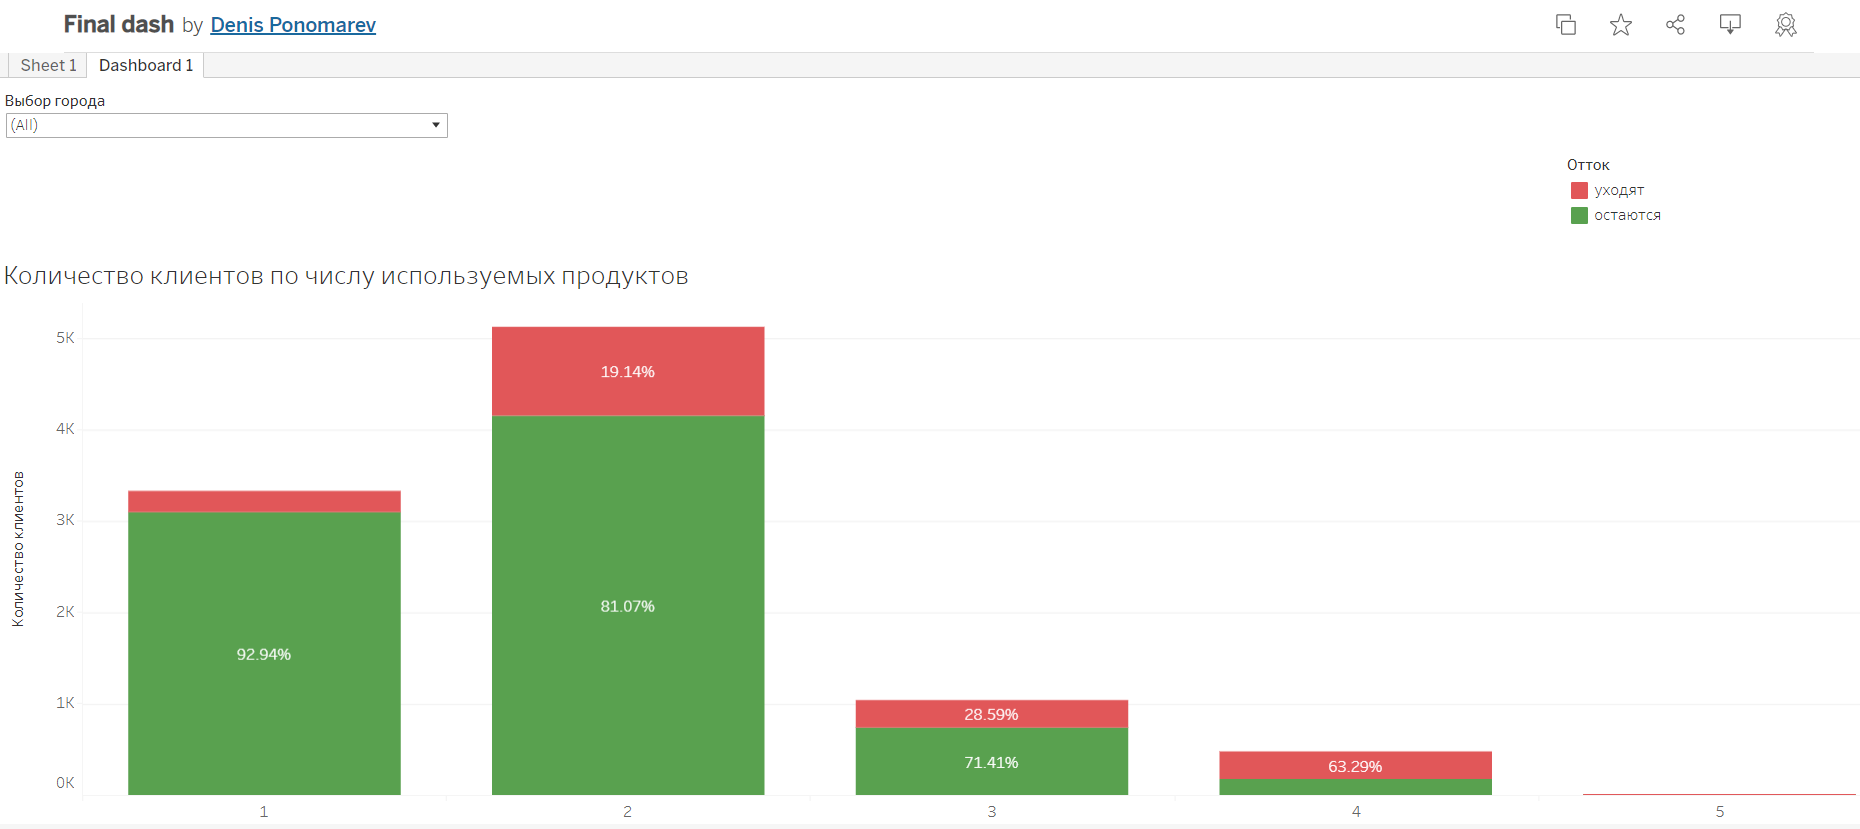